In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# I. Vásárlói viselkedés elemzése

In [2]:
df = pd.read_csv('../_data/DataSet_Tesco5000_withDaynum.csv')

In [3]:
df.head()

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6
3,2,2010-04-12,7.89,11
4,2,2010-04-14,17.17,13


In [4]:
df.shape

(596733, 4)

In [5]:
df['customer_id'].nunique()

5000

## 1.1 Vásárlások száma és átlagos költés alapján szegmentálás

In [6]:
customer_df = df.groupby('customer_id')['visit_spend'].agg(['count', 'mean'])

In [7]:
customer_df.head()

,count,mean
customer_id,,
2,125,20.961280
3,167,27.606707
4,100,106.954800
5,133,31.074436
6,64,55.112344


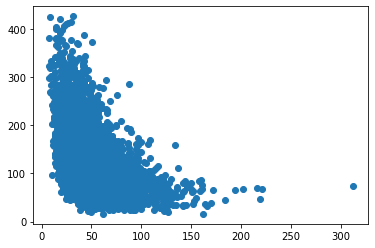

In [8]:
plt.scatter(customer_df['mean'], customer_df['count'])

In [9]:
X_cols = ['mean', 'count']

In [10]:
X = customer_df.loc[:, X_cols]

### 1.1.1 Egyszerű klaszterezés

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


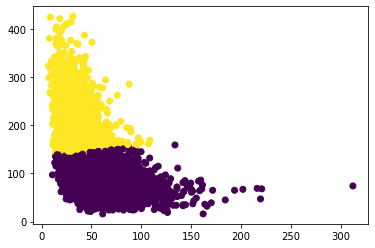

In [11]:
kmeans = KMeans(n_clusters=2, random_state = 42)

kmeans.fit(X)
customer_df['cluster'] = kmeans.predict(X)

plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster'])

### 1.1.2 Skálázott klaszterezés

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
X_scaled = scaler.transform(X)

In [15]:
X_scaled

array([[-1.22022304,  0.08834384],
       [-0.94936008,  0.74466415],
       [ 2.28481299, -0.30232301],
       ...,
       [-0.91287842,  0.7134108 ],
       [-0.92839831,  0.82279752],
       [ 0.56106941, -0.8492566 ]])

In [16]:
kmeans.fit(X_scaled)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [17]:
customer_df['cluster_scaled'] = kmeans.predict(X_scaled)

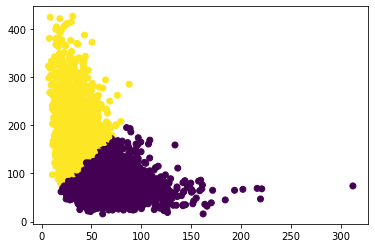

In [18]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster_scaled'])

### 1.1.3 Könyökpont keresés

In [19]:
sse = kmeans.inertia_

In [20]:
sse_list = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(X_scaled)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

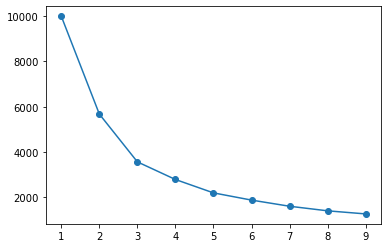

In [21]:
plt.plot(range(1, 10), sse_list, marker='o')

In [22]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X_scaled)
customer_df['cluster_3'] = kmeans.predict(X_scaled)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


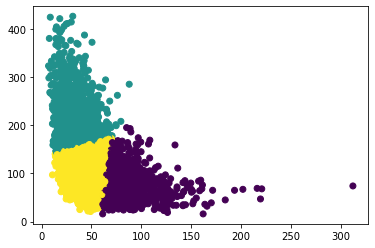

In [23]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster_3'])

### 1.1.4 Centroidok kinyerése

In [24]:
centroids_scaled = kmeans.cluster_centers_

In [25]:
centroids_scaled

array([[ 1.37619185, -0.67453736],
       [-0.72949145,  1.47369437],
       [-0.3080408 , -0.32795804]])

In [26]:
centroids = scaler.inverse_transform(centroids_scaled)

In [27]:
centroids

array([[ 84.6624385 ,  76.18083333],
       [ 33.00102403, 213.65293602],
       [ 43.34101057,  98.35953366]])

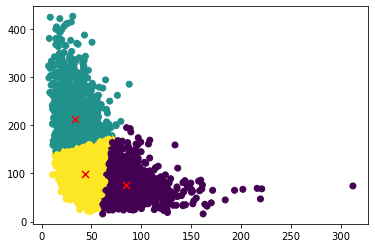

In [28]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster_3'])
plt.scatter(centroids[:, 0], centroids[:, 1], color='r', s=50, marker = 'x')

## 1.2 A hét különböző napján való vásárlás szerinti szegmentálás

In [29]:
df.head()

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6
3,2,2010-04-12,7.89,11
4,2,2010-04-14,17.17,13


In [30]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [31]:
df['dayofweek'] = df['visit_date'].dt.dayofweek + 1

In [32]:
df.head()

,customer_id,visit_date,visit_spend,daynum,dayofweek
0,2,2010-04-01,5.97,0,4
1,2,2010-04-06,12.71,5,2
2,2,2010-04-07,34.52,6,3
3,2,2010-04-12,7.89,11,1
4,2,2010-04-14,17.17,13,3


### 1.2.1 Hét egyes napjain mennyit költött összesen egy vásárló

In [33]:
customer_df = df.groupby(['customer_id', 'dayofweek'])['visit_spend'].sum().unstack()

In [34]:
customer_df.head()

dayofweek,1,2,3,4,5,6,7
customer_id,,,,,,,
2,209.66,316.59,271.62,150.70,1130.00,400.77,140.82
3,259.35,268.16,231.53,752.57,295.20,2319.12,484.39
4,1363.53,1242.90,2130.12,1566.87,1609.84,1920.61,861.61
5,417.31,781.38,468.27,658.71,754.29,894.19,158.75
6,2625.55,356.37,89.42,56.62,312.15,87.08,NaN


In [35]:
customer_df = customer_df.fillna(0)

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [37]:
X_cols = range(1, 8)

In [38]:
X = customer_df.loc[:, X_cols]

In [39]:
X

dayofweek,1,2,3,4,5,6,7
customer_id,,,,,,,
2,209.66,316.59,271.62,150.70,1130.00,400.77,140.82
3,259.35,268.16,231.53,752.57,295.20,2319.12,484.39
4,1363.53,1242.90,2130.12,1566.87,1609.84,1920.61,861.61
5,417.31,781.38,468.27,658.71,754.29,894.19,158.75
6,2625.55,356.37,89.42,56.62,312.15,87.08,0.00
...,...,...,...,...,...,...,...
7371,490.09,317.26,501.04,616.98,473.38,807.11,192.59
7372,1027.62,596.17,1196.02,1283.71,740.82,3043.69,2859.11
7373,2321.43,438.06,259.70,240.14,999.44,388.21,55.81


In [40]:
kmeans.fit(X)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [41]:
customer_df['cluster'] = kmeans.predict(X)

In [42]:
customer_df['cluster'].value_counts()

0    3432
1    1154
2     414
Name: cluster, dtype: int64

<AxesSubplot:xlabel='dayofweek'>

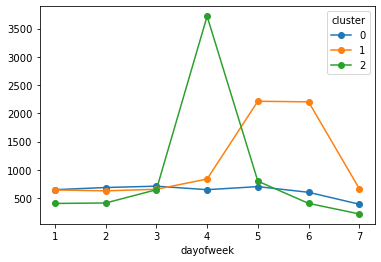

In [43]:
customer_df.groupby('cluster')[X.columns].mean().T.plot(marker='o')

### 1.2.2 Összes költésének hány százalékát végzi adott napon

In [44]:
customer_df['sum'] = customer_df.loc[:, range(1, 8)].sum(axis=1)

In [45]:
for col in X_cols:
    new_col_name = str(col) + '_ratio'
    customer_df[new_col_name] = customer_df[col] / customer_df['sum']

In [46]:
X_cols_ratio = [str(col) + '_ratio' for col in X_cols]

In [47]:
X = customer_df.loc[:, X_cols_ratio]

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [49]:
customer_df['cluster_ratio'] = kmeans.predict(X)

<AxesSubplot:xlabel='dayofweek'>

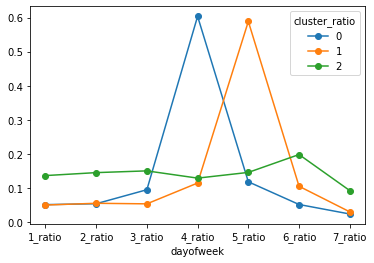

In [50]:
customer_df.groupby('cluster_ratio')[X.columns].mean().T.plot(marker='o')

## 1.3 Havi látogatásszám alapján való szegmentálás

In [51]:
df.head()

,customer_id,visit_date,visit_spend,daynum,dayofweek
0,2,2010-04-01,5.97,0,4
1,2,2010-04-06,12.71,5,2
2,2,2010-04-07,34.52,6,3
3,2,2010-04-12,7.89,11,1
4,2,2010-04-14,17.17,13,3


In [52]:
df['year_month'] = df['visit_date'].apply(lambda x: str(x)[:7])

In [53]:
df['year_month'].unique()

array(['2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09',
       '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06'], dtype=object)

In [54]:
customer_df = df.groupby(['customer_id', 'year_month'])['visit_spend'].count().unstack()

In [55]:
customer_df

year_month,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06
customer_id,,,,,,,,,,,,,,,
2,9.0,10.0,4.0,7.0,7.0,12.0,8.0,8.0,11.0,10.0,8.0,8.0,12.0,6.0,5.0
3,13.0,15.0,10.0,9.0,9.0,10.0,13.0,11.0,10.0,10.0,13.0,9.0,15.0,13.0,7.0
4,8.0,7.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,6.0,6.0,5.0,6.0,8.0,5.0
5,10.0,4.0,8.0,14.0,11.0,7.0,10.0,9.0,2.0,8.0,10.0,14.0,11.0,9.0,6.0
6,4.0,4.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,2.0,4.0,NaN,3.0,1.0,4.0,2.0,1.0,2.0,4.0,3.0,2.0,5.0,4.0,4.0
7372,19.0,21.0,16.0,20.0,15.0,16.0,17.0,15.0,14.0,17.0,13.0,15.0,18.0,6.0,5.0
7373,12.0,12.0,10.0,13.0,14.0,8.0,11.0,10.0,12.0,11.0,8.0,12.0,11.0,11.0,10.0


In [56]:
customer_df = customer_df.fillna(0)

In [57]:
X_cols = customer_df.columns.tolist()

In [58]:
X_cols

['2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06']

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

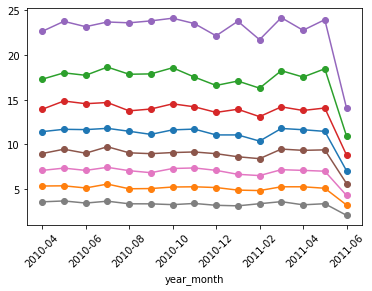

In [59]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(customer_df[X_cols])

customer_df['cluster_month'] = kmeans.predict(customer_df[X_cols])

customer_df.groupby('cluster_month')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

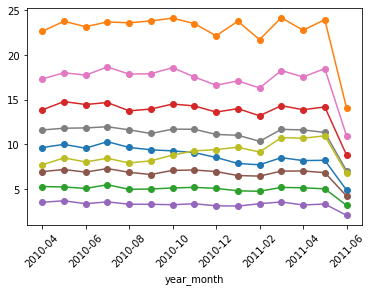

In [60]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(customer_df[X_cols])

customer_df['cluster_month'] = kmeans.predict(customer_df[X_cols])

customer_df.groupby('cluster_month')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

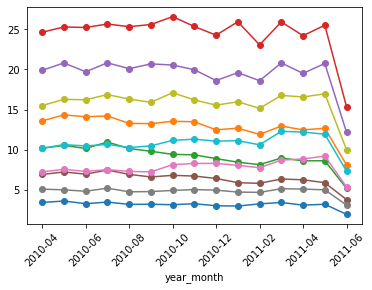

In [61]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(customer_df[X_cols])

customer_df['cluster_month'] = kmeans.predict(customer_df[X_cols])

customer_df.groupby('cluster_month')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

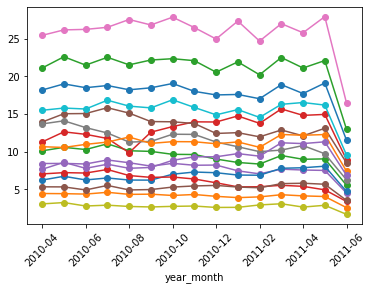

In [62]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(customer_df[X_cols])

customer_df['cluster_month'] = kmeans.predict(customer_df[X_cols])

customer_df.groupby('cluster_month')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)